In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('../datasets/digit recognition/train.csv')

In [3]:
df_train.shape

(42000, 785)

In [4]:
df_train.iloc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [9]:
img_array = np.array(df_train.iloc[0,1:]).reshape(28,28)

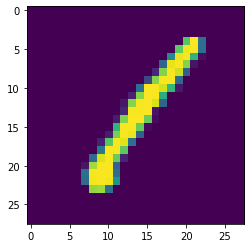

In [10]:
plt.imshow(img_array)

In [5]:
def print_img(index):
    img_array = np.array(df_train.iloc[index,1:]).reshape(28,28)
    plt.imshow(img_array)

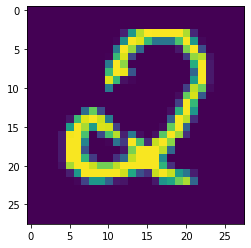

In [7]:
print_img(312)

In [8]:
y = df_train['label']
X = df_train.iloc[:,1:]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=78)

In [10]:
X_train = X_train/255 #Normalization
X_test = X_test/255

In [36]:
y_train

26483    3
27406    3
18213    2
39667    9
13568    4
        ..
22633    3
36904    5
38807    6
16854    1
39621    6
Name: label, Length: 37800, dtype: int64

#Lets do it using SVM

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [38]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9889682539682539, 0.9742857142857143)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(50, activation='relu',input_shape=(784,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                410       
Total params: 41,700
Trainable params: 41,700
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20, batch_size=64)

Epoch 1/20
591/591 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8845 - val_loss: 0.3251 - val_accuracy: 0.9021
Epoch 2/20
591/591 [==============================] - 1s 1ms/step - loss: 0.2015 - accuracy: 0.9419 - val_loss: 0.2265 - val_accuracy: 0.9310
Epoch 3/20
591/591 [==============================] - 1s 1ms/step - loss: 0.1530 - accuracy: 0.9542 - val_loss: 0.2015 - val_accuracy: 0.9374
Epoch 4/20
591/591 [==============================] - 1s 1ms/step - loss: 0.1244 - accuracy: 0.9631 - val_loss: 0.1672 - val_accuracy: 0.9533
Epoch 5/20
591/591 [==============================] - 1s 1ms/step - loss: 0.1063 - accuracy: 0.9685 - val_loss: 0.1584 - val_accuracy: 0.9569
Epoch 6/20
591/591 [==============================] - 1s 1ms/step - loss: 0.0914 - accuracy: 0.9731 - val_loss: 0.1421 - val_accuracy: 0.9624
Epoch 7/20
591/591 [==============================] - 1s 1ms/step - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.1383 - val_accuracy: 0.9598
Epoch 

In [29]:
#Score on unlnown data
model.evaluate(X_test,y_test)

132/132 [==============================] - 0s 635us/step - loss: 0.1688 - accuracy: 0.9652


[0.16876448690891266, 0.965238094329834]

In [21]:
X_test.shape

(4200, 784)

In [30]:
y_pre = model.predict(X_test)

In [36]:
y_pre[2].argmax()

0

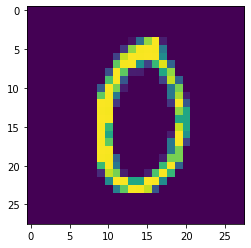

In [44]:
plt.imshow(np.array(X_test.iloc[2]*255).reshape(28,28))

In [48]:
y_pre.argmax(axis=1).shape

(4200,)

In [49]:
df_test = pd.read_csv('../datasets/digit recognition/test.csv')

In [50]:
df_test.shape

(28000, 784)

In [51]:
X = df_test/255

In [52]:
y_pre = model.predict(X)

In [57]:
y_final = y_pre.argmax(axis=1)

In [54]:
y_pre[0]

array([7.6955835e-13, 2.4142033e-25, 1.0000000e+00, 2.9631300e-12,
       3.2426612e-17, 4.4484827e-19, 4.3901148e-14, 9.9833164e-10,
       7.5751978e-15, 1.8717275e-22], dtype=float32)

In [58]:
y_final

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [60]:
df_test['Label'] = y_final

In [62]:
df_test[['Label']].to_csv('s1.csv')